<a href="https://colab.research.google.com/github/mchanwa/SummerAnalysis/blob/main/carsnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Preprocess the Data
We import and display the car data we are interested in. We take a peek at the dataset to see what it looks like.

In [5]:
# Import the data and preprocess.
import numpy as np
import pandas as pd
df = pd.read_csv('/content/audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


We have nine columns: model, year, price, transmission, mileage, fuelType, tax, mpg, and engineSize. We explore the datatypes of each column and convert to the right datatype where necessary.

In [6]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [7]:
df['price'] = df['price'].astype('float')
df['mileage'] = df['mileage'].astype('float')
df.dtypes

model            object
year              int64
price           float64
transmission     object
mileage         float64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

We then look at the descriptive statistics of all numeric values in the dataset.

In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


We check for any missing data in the dataset to ensure our analysis does not encounter null values.

In [9]:
print('Number of missing values in year column: {}'.format(df['year'].isnull().sum()))
print('Number of missing values in price column: {}'.format(df['price'].isnull().sum()))
print('Number of missing values in mileage column: {}'.format(df['mileage'].isnull().sum()))
print('Number of missing values in tax column: {}'.format(df['tax'].isnull().sum()))
print('Number of missing values in mpg column: {}'.format(df['mpg'].isnull().sum()))
print('Number of missing values in engineSize column: {}'.format(df['engineSize'].isnull().sum()))
print('Number of missing values in transmission column: {}'.format(df['transmission'].isnull().sum()))
print('Number of missing values in model column: {}'.format(df['model'].isnull().sum()))

Number of missing values in year column: 0
Number of missing values in price column: 0
Number of missing values in mileage column: 0
Number of missing values in tax column: 0
Number of missing values in mpg column: 0
Number of missing values in engineSize column: 0
Number of missing values in transmission column: 0
Number of missing values in model column: 0


# Exploratory Data Analysis
We carryout some exploratory data analysis on the dataset of interest.

In [10]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Continuous Variables

In [11]:
# Function for exploratory analysis on continuous variables
def cont_explore(column,target, dataframe):
    sns.regplot(x = column, y = target, data = dataframe)
    corr, p = stats.pearsonr(df[column], df[target])
    print(f'correlation = {corr}\np = {p}')

correlation = -0.5353570952322908
p = 0.0


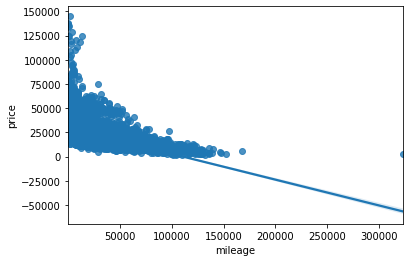

In [12]:
# Mileage
cont_explore('mileage','price', df)

correlation = -0.6003343844160696
p = 0.0


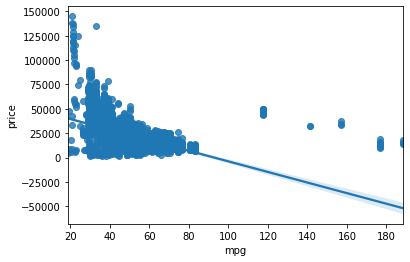

In [13]:
# mpg
cont_explore('mpg', 'price', df)

## Categorical Variables

In [14]:
# Function for exploratory analysis on categorical variables
def cat_explore(column, target, dataframe):
    print(f'Number of unique {column} values: {df[column].unique().size}\n')
    counts = df[column].value_counts().to_frame()
    counts = counts.reset_index().rename(columns = {'index': column, column: 'count'})
    print(counts.head())
    sns.boxplot(x = column, y = target, data = dataframe)
    groups = df[[column, target]].groupby([column])
    args = [groups.get_group(val)[target] for val in df[column].unique().tolist()]
    f, p = stats.f_oneway(*args)
    print(f'\nf-statistic = {f}\np-value = {p}')


Number of unique tax values: 37

   tax  count
0  145   5407
1   30   1208
2  150   1129
3   20    624
4    0    536

f-statistic = 124.36745618369223
p-value = 0.0


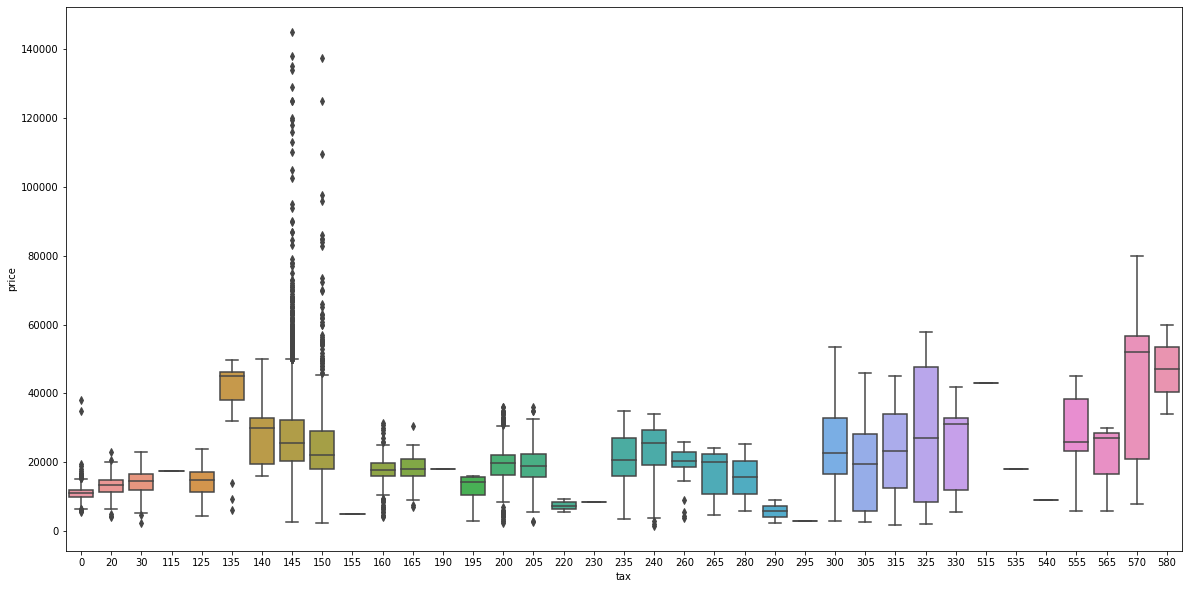

In [15]:
# Tax
plt.figure(figsize = (20, 10))
cat_explore('tax', 'price', df)

Number of unique transmission values: 3

  transmission  count
0       Manual   4369
1    Semi-Auto   3591
2    Automatic   2708

f-statistic = 1634.1582797448552
p-value = 0.0


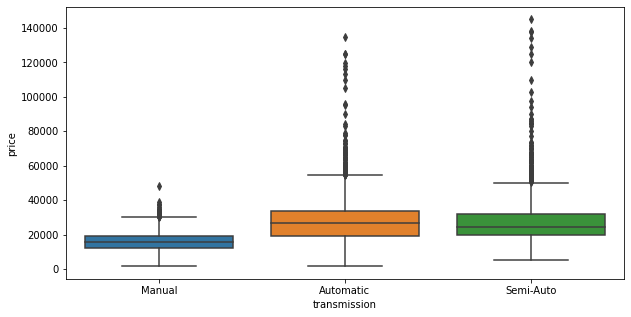

In [16]:
# Transmission
plt.figure(figsize = (10, 5))
cat_explore('transmission', 'price', df)

Number of unique engineSize values: 19

   engineSize  count
0         2.0   5169
1         1.4   1594
2         3.0   1149
3         1.6    913
4         1.5    744

f-statistic = 600.9280673687181
p-value = 0.0


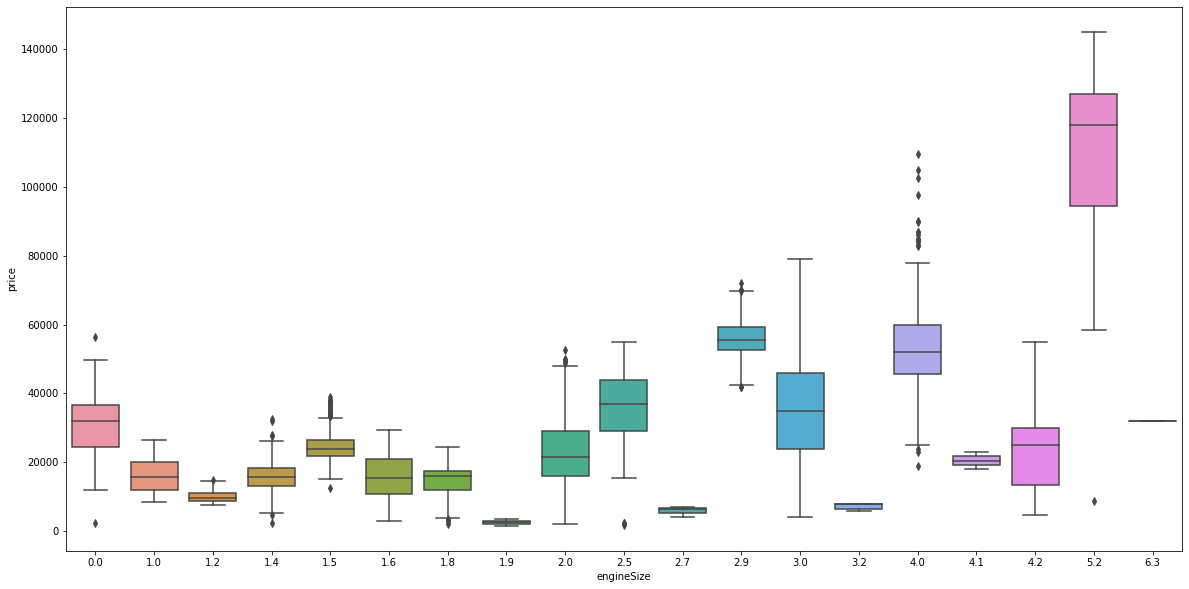

In [17]:
# engineSize
plt.figure(figsize = (20, 10))
cat_explore('engineSize', 'price', df)

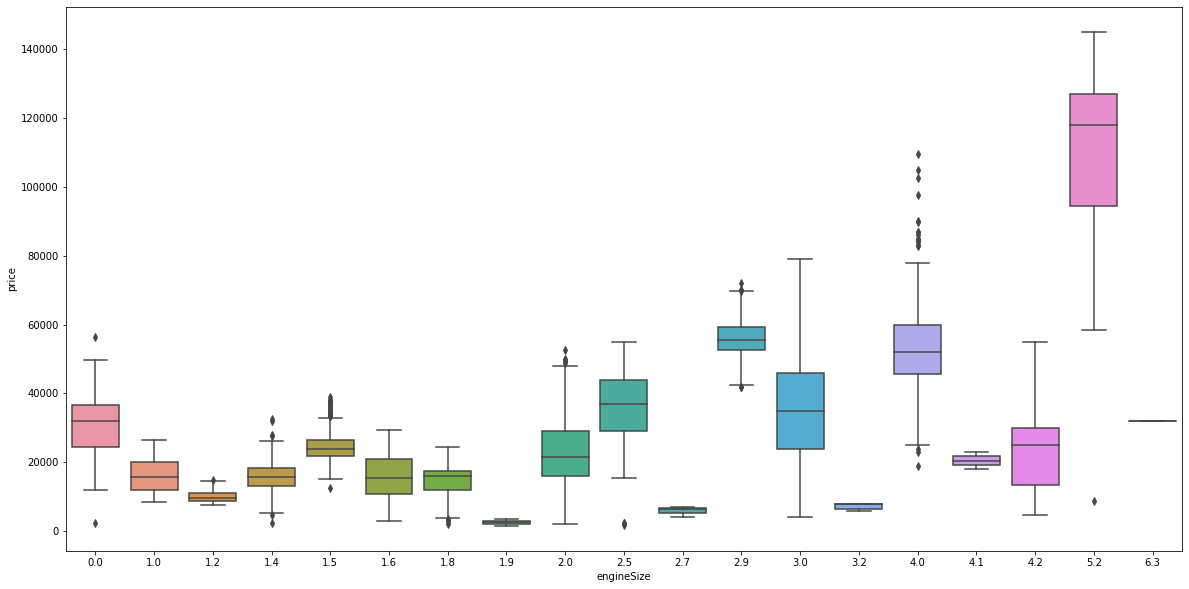

In [18]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'engineSize', y = 'price', data = df)

Number of unique fuelType values: 3

  fuelType  count
0   Diesel   5577
1   Petrol   5063
2   Hybrid     28

f-statistic = 10.998637020139045
p-value = 1.6914997873417507e-05


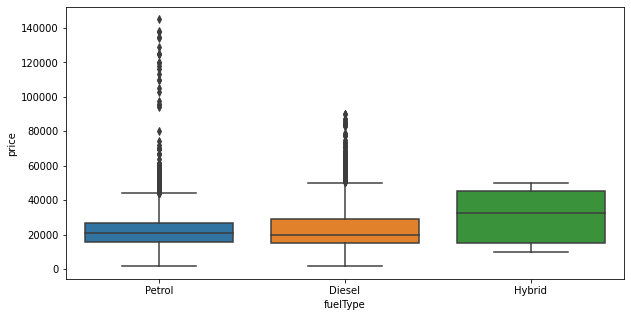

In [19]:
# Fuel Type
plt.figure(figsize = (10, 5))
cat_explore('fuelType', 'price', df)

Number of unique year values: 21

   year  count
0  2019   3197
1  2016   1964
2  2017   1935
3  2015    999
4  2018    864

f-statistic = 360.4222400698582
p-value = 0.0


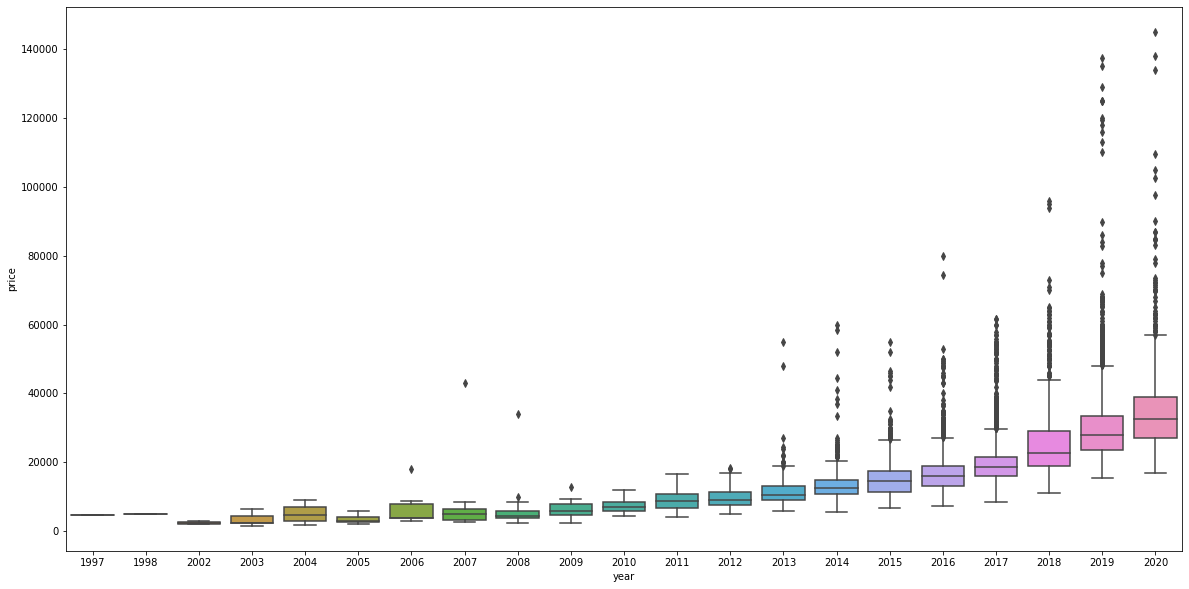

In [20]:
# Year
plt.figure(figsize = (20, 10))
cat_explore('year', 'price', df)

# Model Development

In [21]:
# Evaluating Linear Regression with Residual Plots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We only build regression models on continuous varibles. We will use one-hot encodig for categorical variables in a future notebook. You can find the function to carryout one-hot encoding at the end of this notebook.

In [22]:
# Get Numerical Data Only
X = df._get_numeric_data().drop(columns = 'price')
Y = df['price']
X.head()

,year,mileage,tax,mpg,engineSize
0,2017,15735.0,150,55.4,1.4
1,2016,36203.0,20,64.2,2.0
2,2016,29946.0,30,55.4,1.4
3,2017,25952.0,145,67.3,2.0
4,2019,1998.0,145,49.6,1.0


We build and fit polynomial models of degrees 1 to 10. We proceed to plot the R^2 scores for these models. As expected, the R^2 score increase with degree.

In [23]:
MyModels = []
for degree in range(1, 11):
    MyModels.append(Pipeline([('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree = degree)), ('model', LinearRegression())]))

In [24]:
ModelScores = []
for model in MyModels:
    model.fit(X, Y)
    ModelScores.append(model.score(X, Y))
print(ModelScores)

[0.7755618718775095, 0.8891315766442099, 0.9106500594177623, 0.9172157782464011, 0.9281691217391456, 0.9341480887873194, 0.9411271262022507, 0.9475278579515052, 0.954618569784789, 0.9577943025031234]


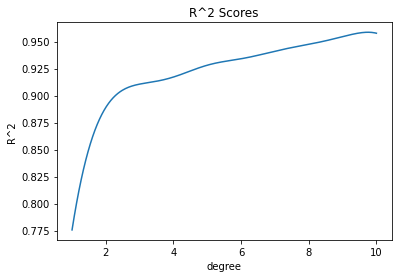

In [25]:
from scipy.interpolate import make_interp_spline, BSpline
points = np.linspace(1, 10, 400)
degree = list(range(1, 11))
interp = make_interp_spline(degree, ModelScores, k=5)
smooth = interp(points)
plt.plot(points, smooth)
plt.title('R^2 Scores')
plt.xlabel('degree')
plt.ylabel('R^2')
plt.show()

We plot the actual value against the predicted value to see how well our model approximates the price. Looking at the plots, we see that the model we will accept has degree at least 2. For a good model, the points are close to the line $y = x$. As expected, this becomes the case as we increase the degree of the polynomial.

In [26]:
def modelPlot(X, Y, model, degree = 1, customTitle = False, title = ''):
    Y_hat = model.predict(X)
    my_df = pd.DataFrame([])
    my_df['true'] = Y
    my_df['predicted'] = Y_hat
    sns.regplot(x = 'true', y = 'predicted', data = my_df)
    if customTitle:
        plt.title(title)
    else:
        plt.title(f'degree {degree} actual-predicted value plot')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.ylim(0,)
    plt.show()

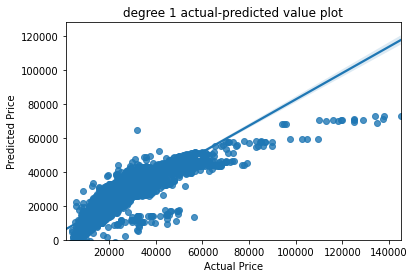

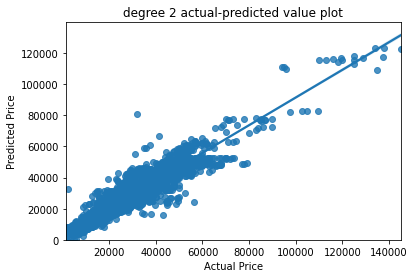

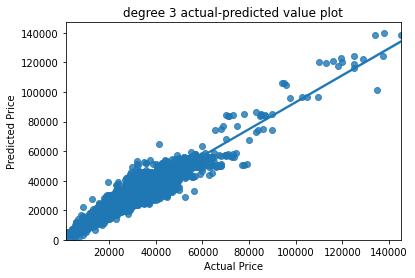

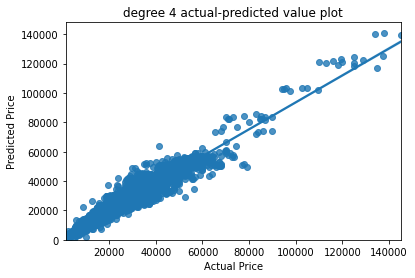

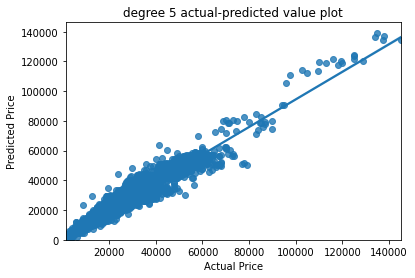

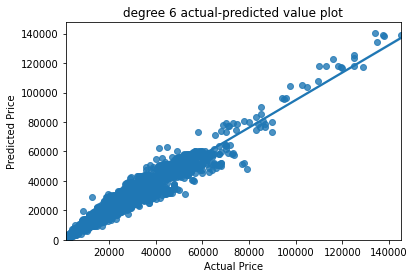

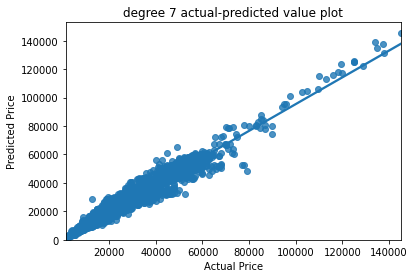

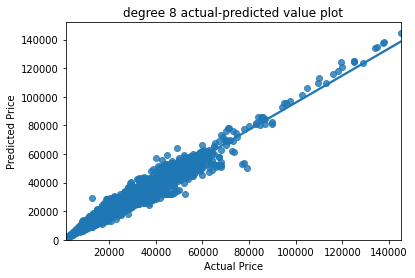

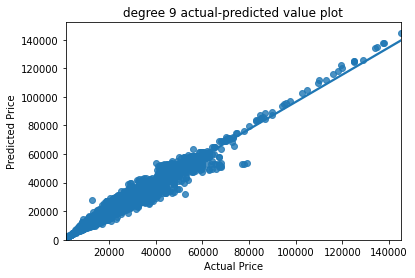

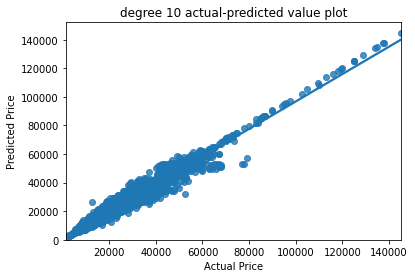

In [27]:
for j in range(1, 11):
    modelPlot(X,Y, MyModels[j - 1], j)

We also make distribution plots to compare distributions of prices in the actual dataset against the distribution in the predictions. This will also help us see how close the model comes to predicting the target.

In [28]:
def distPlot(X, Y, model, degree = 1, customTitle = False, title = ''):
    ax = sns.kdeplot(model.predict(X), color = 'b', label = 'Predicted Value', legend = True)
    sns.kdeplot(Y, color = 'r', label = 'Actual Value', ax = ax, legend = True)
    plt.legend()
    if customTitle:
        plt.title(title)
    else:
        plt.title(f'degree {degree} distribution plot')
    plt.show()

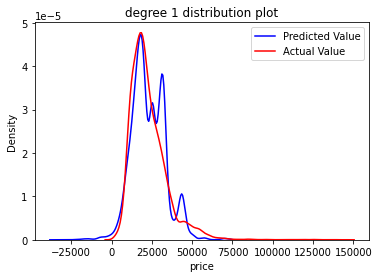

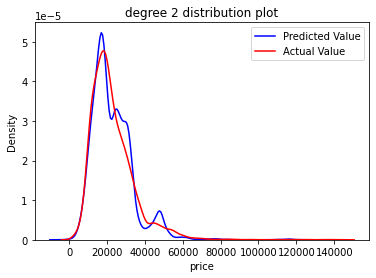

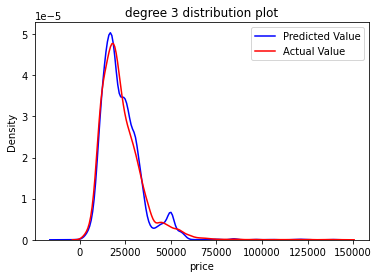

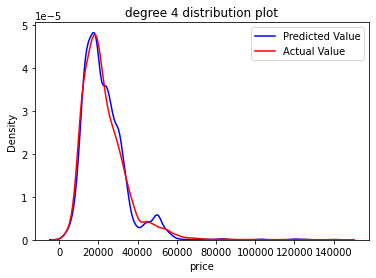

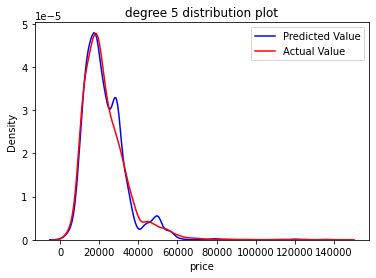

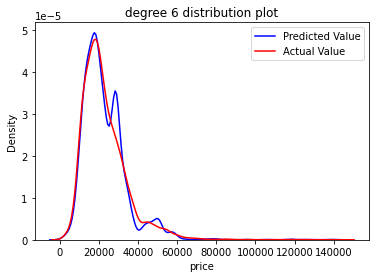

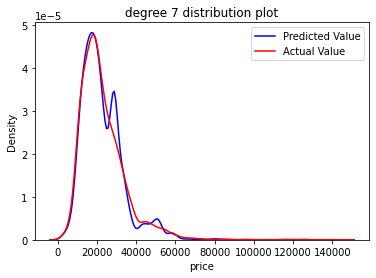

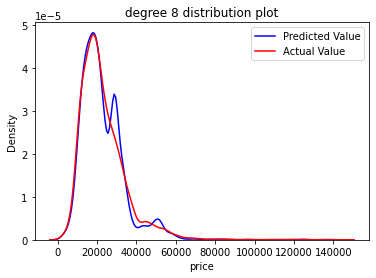

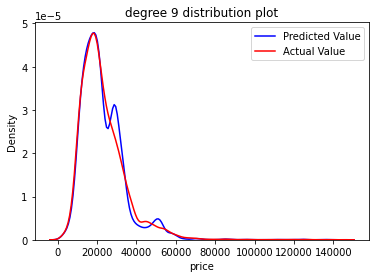

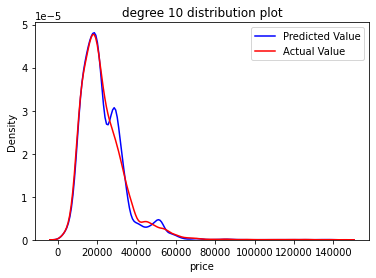

In [29]:
for j in range(1, 11):
    distPlot(X,Y, MyModels[j - 1], degree = j)

Taking a cursory glance at the distribution plots, we see that models of degrees 3 and 4 appear to approximate the actual price distribution optimally. Other models give bad approximations to the distribution in certain regions. We explore this observation in the following section.

# Model Evaluation and Refinement
## Cross-Validation

We use cross-validation to see which model generalizes best.

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
rcross = []
for model in MyModels:
    rcross.append(cross_val_score(model, X, Y, cv = 5).mean())
rcross

[0.7504191829178867,
 0.8688607054646587,
 0.8821908606278395,
 -0.5492808640746859,
 -53.29680215650635,
 -69700.88971368072,
 -1228982.1355407527,
 -1857026909.2461796,
 -2017647955790499.2,
 -4.5113962475545994e+18]

We observe that the best performing models for cross-validation are the ones with degrees 3 and 2, in that order. Because the models with degree at least 5 have very bad performance with cross-validation, we drop these models.

In [32]:
MyModels = []
for degree in range(1, 5):
    MyModels.append(Pipeline([('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree = degree)), ('model', LinearRegression())]))

## Train Test Split

We split the dataset into training and test sets.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)

## Training and Test Loss

To determine the optimal model, we make plots of the training and test losses and R^2. The function below will help us accomplish this.

In [34]:
def metricPlot(degree, models, metric, metric_name, k = 3):
    train = []
    test = []
    for model in models:
        model.fit(X_train, Y_train)
        train.append(metric(model.predict(X_train), Y_train))
        test.append(metric(model.predict(X_test), Y_test))
    points = np.linspace(min(degree), max(degree), 400)
    train_interp = make_interp_spline(degree, train, k=k)
    test_interp = make_interp_spline(degree, test, k=k)
    train_smooth = train_interp(points)
    test_smooth = test_interp(points)
    plt.plot(points, train_smooth, label = 'Train Data')
    plt.plot(points, test_smooth, label = 'Test Data')
    plt.xlabel('Degree')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

We first plot the MSE for each degree of the polynomial. We see that the test MSE is minimized for the degree 3 polynomial. We see also that the test R^2 is maximized for the degree 3 polynomial.

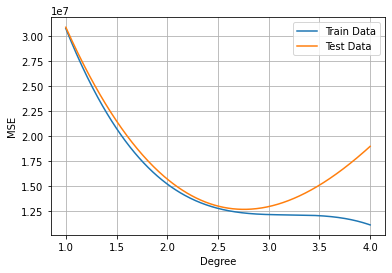

In [35]:
metricPlot(list(range(1, len(MyModels) + 1)), MyModels, mean_squared_error, 'MSE')

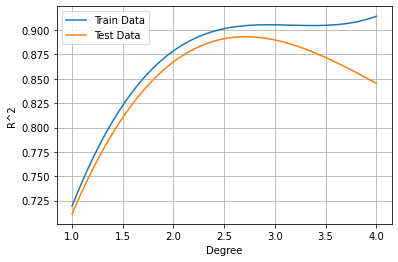

In [36]:
metricPlot(list(range(1, len(MyModels) + 1)), MyModels, r2_score, 'R^2')

We see, then, that the degree 3 polynomial is optimal.

## Adding $L^2$ regularization

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

We try to encorporate $L^2$ regularization to reduce the effects of noise and outliers on the model. We use grid search to vary the alpha parameter to determine the strength of $L^2$ regularization applied. We also vary the degree in case the polynomial of degree 4 improves significantly after regularization.

In [39]:
parameters = [{'model__alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'polynomial__degree': [1, 2, 3, 4, 5]}]
ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('polynomial', PolynomialFeatures()),('model', Ridge())])
ridge_grid = GridSearchCV(ridge_pipeline, parameters, cv = 5)
ridge_grid.fit(X_train, Y_train)
MyRidgeModel = ridge_grid.best_estimator_
MyRidgeModel

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=100, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

After carrying out the search, we see that the optimal model is still a polynomial regreesion model with degree 3 and $L^2$ regularization with $\alpha$ equal to $100$. We explore this model in the following subsection.

### Optimal Ridge Regression Model

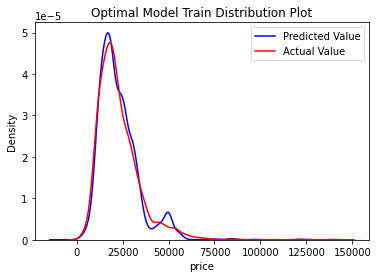

In [40]:
distPlot(X_train, Y_train, MyRidgeModel, customTitle = True, title = 'Optimal Model Train Distribution Plot')

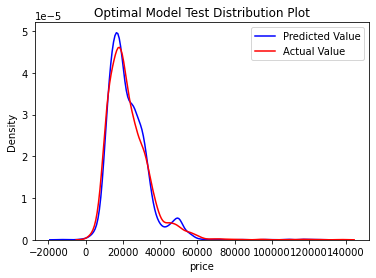

In [41]:
distPlot(X_test, Y_test, MyRidgeModel, customTitle = True, title = 'Optimal Model Test Distribution Plot')

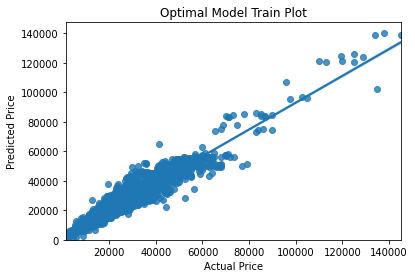

In [42]:
modelPlot(X_train, Y_train, MyRidgeModel, customTitle = True, title = 'Optimal Model Train Plot')

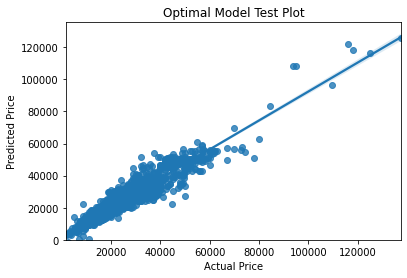

In [43]:
modelPlot(X_test, Y_test, MyRidgeModel, customTitle = True, title = 'Optimal Model Test Plot')

Text(0.5, 1.0, 'Optimal Model Residual Plot')

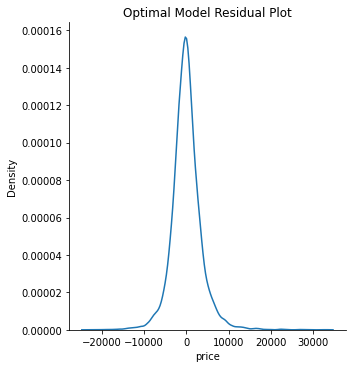

In [44]:
# Residual Plot
y = Y - MyRidgeModel.predict(X)
sns.displot(data = y, kind = 'kde')
plt.title('Optimal Model Residual Plot')

In [45]:
print(f'Optimal Model Train R^2: {MyRidgeModel.score(X_train, Y_train)}')
print(f'Optimal Model Test R^2: {MyRidgeModel.score(X_test, Y_test)}')

Optimal Model Train R^2: 0.9131236003326407
Optimal Model Test R^2: 0.9001345096560802


Having analyzed the data, we find that we can come up with a model with an $R^2$ score of $0.9$. We conclude this notebook by printing the optimal model below:

In [46]:
print(MyRidgeModel)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=100, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
